<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Introduction  

### Machine Learning Modeling in Python with scikit-learn Pipelines 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

###  Machine Learning Modeling Pipelines

Machine learning workflows can be complicated, with various steps:

* data preparation, feature engineering transformations

* model parameter fitting

* model hyperparameter tuning

* modeling method selection

* searching over a large combinatorial of hyperparameters

* training and testing model runs

Pipelines are a scikit-learn class that allows for the encapsilation of a seuqence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible

The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

#### Machine Learning-based Prediction

Predictive machine learning methods with supervised learning: 

**Prediction**

* non-parametric method for regression and classification

* a function $\hat{f}$ of the nearest $k$ training data in predictor feature space such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Suppervised Learning**

* the response feature label, $Y$, is available over the training and testing data

#### The Machine Learning Models

This workflow includes the following models:

* linear regression
* k-nearest neighbor regression
* decision tree regression
* random forest regression
* tree-based gradient boosting regression  

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

If you want to work locally you will need to first copy the data file to your working directory. It is available here:

* Tabular data - unconv_MV.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv).

You don't have to download the data if you want to load directly from my github account with the code below.

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [95]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn.neighbors import KNeighborsRegressor           # for nearest k neighbours
from sklearn import tree                                    # decision trees
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import cross_val_score         # cross validation methods
import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from matplotlib import gridspec
from subprocess import check_call
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.preprocessing import StandardScaler            # data transformation
from sklearn.pipeline import Pipeline                       # machine learning modeling pipeline
from sklearn.pipeline import make_pipeline                  # machine learning modeling pipeline
from sklearn.model_selection import GridSearchCV            # model hyperparameter grid search
from sklearn.model_selection import KFold                   # k-fold cross validation
seed = 73073                                                # random number seed

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [91]:
def visualize_model(model,xfeature,x_min,x_max,x_label,yfeature,y_min,y_max,y_label,response,z_min,z_max,resp_label,title,legend=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(x_label); plt.ylabel(y_label)
    plt.xlim(x_min,x_max); plt.ylim(y_min,y_max)
    if legend == True:
      cbar = plt.colorbar(im, orientation = 'vertical')
      cbar.set_label(resp_label, rotation=270, labelpad=20)
        
def visualize_model_sub(ax,model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,legend=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = ax.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    ax.set_title(title); ax.set_xlabel(xfeature.name); ax.set_ylabel(yfeature.name)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    if legend == True:
      cbar = plt.colorbar(im, orientation = 'vertical')
      cbar.set_label(response.name, rotation=270, labelpad=20)

def visualize_model_wrap(model,ix1,ix2,iy,title,trans=True):
    if trans == True:
        visualize_model(model,X[features[ix1]],vmin_trans[ix1],vmax_trans[ix1],str(features[ix1]) + ' (' + str(units[ix1]) + ') ',
                              X[features[ix2]],vmin_trans[ix2],vmax_trans[ix2],str(features[ix2]) + ' (' + str(units[ix2]) + ') ',
                              y[features[iy]],vmin[iy],vmax[iy],str(features[iy]) + ' (' + str(units[iy]) + ') ',
                              title,legend=True)# plots the data points and the decision tree prediction 
    if trans == False:
        visualize_model(model,X_orig[features[ix1]],vmin[ix1],vmax[ix1],str(features[ix1]) + ' (' + str(units[ix1]) + ') ',
                              X_orig[features[ix2]],vmin[ix2],vmax[ix2],str(features[ix2]) + ' (' + str(units[ix2]) + ') ',
                              y[features[iy]],vmin[iy],vmax[iy],str(features[iy]) + ' (' + str(units[iy]) + ') ',
                              title,legend=True)# plots the data points and the decision tree prediction 

        
def visualize_tuned_model(k_tuned,k_mat,score_mat):
    plt.scatter(k_mat,score_mat,s=5.0, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.5, verts=None, edgecolors="black")
    plt.plot([k_tuned,k_tuned],[0,10000000],color='black',linestyle=(6, (2,3)),label='tuned',zorder=1)
    plt.title('k-fold Cross Validation Error (MSE) vs. k Nearest Neighbours'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error')
    plt.xlim(k_min,k_max); plt.ylim(0,np.max(score_mat))
    
def visualize_tuned_model2(k_tuned,k_mat,score_mat):
    plt.scatter(k_mat[0:len(k_mat):2],score_mat[0:len(k_mat):2],s=5.0, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.4, linewidths=0.5, verts=None, edgecolors="black",label='uniform',zorder=3)
    plt.scatter(k_mat[1:len(k_mat):2],score_mat[1:len(k_mat):2],s=5.0, c="blue", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.4, linewidths=0.5, verts=None, edgecolors="black",label='distance',zorder=2)
    plt.plot([k_tuned,k_tuned],[0,10000000],color='black',linestyle=(6, (2,3)),label='tuned',zorder=1)
    plt.legend(loc='lower right')
    plt.title('k-fold Cross Validation Error (MSE) vs. k Nearest Neighbours'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error')
    plt.xlim(k_min,k_max); plt.ylim(0,np.max(score_mat))

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [3]:
os.chdir("c:/PGE383")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

We use a data "unconv_MV.csv" comma delimited file from my GitHub [respository](https://github.com/GeostatsGuy/GeoDataSets).  

* this code loads the data directly from my GitHub repository.
* if you have the data file available locally (i.e. you are not connected to the internet) set the working directory to the location with the data file and use the second line below

In [4]:
my_data = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv")   # load the comma delimited data file
#my_data = pd.read_csv("unconv_MV.csv")                     # load the comma delimited data file locally

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [5]:
my_data[:7]                                                 # preview the first 7 rows of the dataframe

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919
5,6,19.47,2.04,2.73,54.37,1.42,2.12,5497.005506
6,7,12.70,1.30,3.70,43.03,0.45,1.95,1784.266285


Let's remove the well index and check the summary summary statistics.

In [6]:
my_data = my_data.iloc[:,1:8]                               # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


It is good that we checked the summary statistics, because we have some negative values for brittleness and total organic carbon. The is physically imposible.  The values must be in error. We know the lowest possible values are 0.0, so we will truncate on 0.0.  We use the *get_numerical_data()* DataFrame member function to get a shallow copy of the data from the DataFrame.  Since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  This allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [7]:
num = my_data._get_numeric_data()                           # get the numerical values
num[num < 0] = 0                                            # truncate negative values to 0.0
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.731480,15.033593,0.000000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


#### Let's Build a Predictive Machine Learning Model

We will complete the entire data transformation, model parameter training and model hyperparameter tuning workflow:

1. step-by-step with low level code
2. with a concise high level code using **pipelines**

Here's our machine learning prediction model:

\begin{equation}
y = f(X_1,X_2) + \epsilon
\end{equation}

We will use k-nearest neighbors regression, if you are interested in more details I have a lecture and examples online:

* k-nearest nearbours [Lecture](https://www.youtube.com/watch?v=lzmeChSYvv8&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=30)

* I have a lot of lectures available on machine learning in the Subsurface Machine Learning [Playlist](https://www.youtube.com/watch?v=5kBS5ThMHcU&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) 

The general workflow is:

A. **Data Preparation and Feature Engineering** - visualize the data, store feature labels and units, select 2 predictor features and standardize the predictor features to avoid biased predictions due to difference in the units. You can also add noise to the response feature to better observe model overfit.

B. select 2 features so we can visualize the model

Note, we select 2 features for ease of model visualization and to provide the opportunity to explore different models with the same dataset.

### A. Data Preparation and Feature Engineering

The k-nearest neighbour etc. method uses a nearest training sample search in feature space (like k-means clustering). To remove the impact feature range from the approach we standardize the features.

* we will standardize our predictor features to have a mean of zero and a variance of one.
* we use the scikikt learn preprocessing to simplify this step and to provide a reverse transform.

We will also store the names, units and minimum and maximum values in arrays.

In [8]:
transform = StandardScaler();
my_data_trans = my_data.copy(deep = True)
my_data_trans.iloc[:,:] = transform.fit_transform(my_data) 
my_data_trans.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,1.186273e-16,1.0005,-3.153925,-0.691175,0.011406,0.703255,3.203157
LogPerm,1000.0,-2.957079e-16,1.0005,-3.151793,-0.662653,-0.021885,0.692819,2.910864
AI,1000.0,4.085621e-16,1.0005,-3.503327,-0.701684,0.047442,0.653670,2.974660
Brittle,1000.0,1.345590e-16,1.0005,-3.309679,-0.666107,-0.003426,0.628143,2.910842
TOC,1000.0,-1.093570e-17,1.0005,-2.014001,-0.732944,-0.022358,0.708244,3.410473
VR,1000.0,-3.831380e-16,1.0005,-3.542302,-0.588138,0.028665,0.588658,2.950365
Production,1000.0,-4.163336e-17,1.0005,-1.533683,-0.721496,-0.185038,0.530431,7.052394


#### Feature Attributes

Let's store the features' attributes:

* name
* units
* minimum value
* maximum value

To assist with all the plots and associated labels and color bars.

In [9]:
features = np.array(my_data_trans.columns.tolist())               # array of feature names
units = ['%','Log(mD)','kg/m2s*10^6','%','%','%','MCFPD']   # list of feature units
vmin = my_data.min(); vmax = my_data.max() # list of feature minimums and maximums
vmin_trans = my_data_trans.min(); vmax_trans = my_data_trans.max() # list of feature minimums and maximums

print('Available features are ' + str(features) + '.')
print('Available features\' units are ' + str(features) + '.')
print('Available features\' minimum values are ' + str(vmin.values) + '.')
print('Available features\' maximum values are ' + str(vmax.values) + '.')
print('Available transformed features\' minimum values are ' + str(vmin_trans.values) + '.')
print('Available transformed features\' maximum values are ' + str(vmax_trans.values) + '.')

Available features are ['Por' 'LogPerm' 'AI' 'Brittle' 'TOC' 'VR' 'Production'].
Available features' units are ['Por' 'LogPerm' 'AI' 'Brittle' 'TOC' 'VR' 'Production'].
Available features' minimum values are [5.4        0.12       0.96       0.         0.         0.9
 2.71353485].
Available features' maximum values are [2.46500000e+01 2.58000000e+00 4.70000000e+00 9.34700000e+01
 2.71000000e+00 2.90000000e+00 1.25686441e+04].
Available transformed features' minimum values are [-3.15392477 -3.15179313 -3.50332658 -3.30967893 -2.0140009  -3.54230176
 -1.53368327].
Available transformed features' maximum values are [3.20315665 2.91086412 2.97466048 2.91084154 3.41047254 2.95036531
 7.0523943 ].


This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Working with Only Two Predictor Features

Let's simplify the problem:

* to 2 predictor features, Porosity and Brittleness to predict Production rate. 
* this is very easy to visualize the prediction model as a map over the predictor feature space.

Select the 2 predictor features and the 1 response feature by index below with this code:

```python
ix1 = 0                                                     # select the predictor features
ix2 = 3                                        
iy = 6                                                      # select the response feature
```

Make sure the indices are between 0 and do not repeat.

In [10]:
ix1 = 0                                                     # select the predictor features
ix2 = 3                                        
iy = 6                                                      # select the response feature
X = my_data_trans.iloc[:,[ix1,ix2]]                         # use transformed predictor features
X_orig = my_data.iloc[:,[ix1,ix2]]                          # include nonstransformed predictor features for pipeline
y = pd.DataFrame(data = my_data.iloc[:,iy])                 # use original response features
print('Predictor features are ' + str(features[[ix1,ix2]]) + ', and the response feature is ' + str(features[iy]) + '.')

Predictor features are ['Por' 'Brittle'], and the response feature is Production.


#### Optional: Add Random Error to the Response Feature, $y$

This dataset is quite well-behaved and error free.

* to observe issues of overfit in model training let's add some error

In [11]:
standardized_error_standard_deviation = 1000.0
y_old = y.copy(deep = True)
y[features[iy]] = y[features[iy]] + np.random.normal(loc = 0, scale = standardized_error_standard_deviation, size = y.shape[0])

#### Date Univariate Distributions

Let's first check the univariate statistics of the 2 predictor features, $X_1$ and $X_2$ and the 1 response feature, $y$.

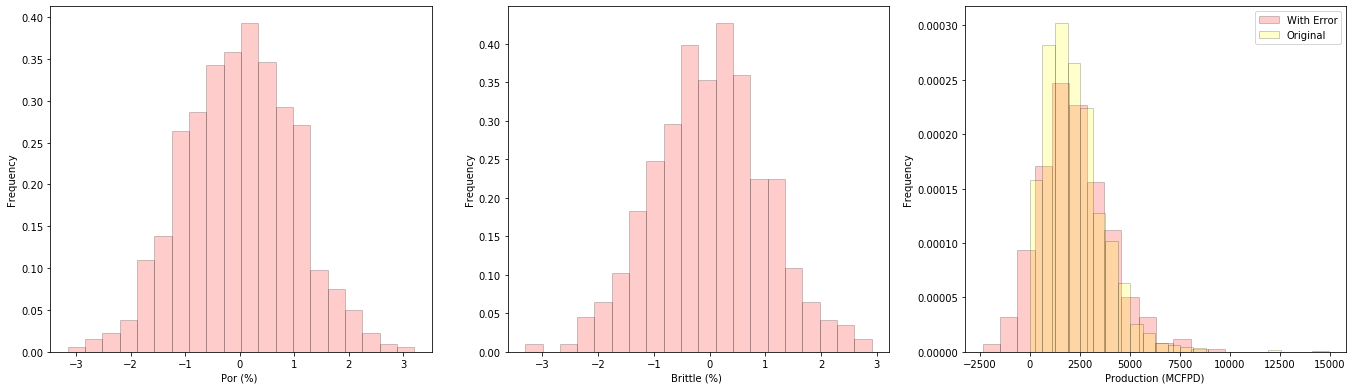

In [12]:
plt.subplot(131)
plt.hist(X[features[ix1]], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20,density=True)
plt.xlabel(str(features[ix1]) + ' (' + str(units[ix1]) + ') '); plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(X[features[ix2]], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20,density=True)
plt.xlabel(str(features[ix2]) + ' (' + str(units[ix2]) + ') '); plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(y[features[iy]], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20,density=True,label = 'With Error')
plt.hist(y_old[features[iy]], alpha = 0.2, color = 'yellow', edgecolor = 'black', bins=20,density=True,label = 'Original')
plt.xlabel(str(features[iy]) + ' (' + str(units[iy]) + ') '); plt.ylabel('Frequency')
plt.legend(loc = 'upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Bivariate Distributions 

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  Let's look at a scatter plot of $X_1$ vs. $X_2$ with points colored by $y$.

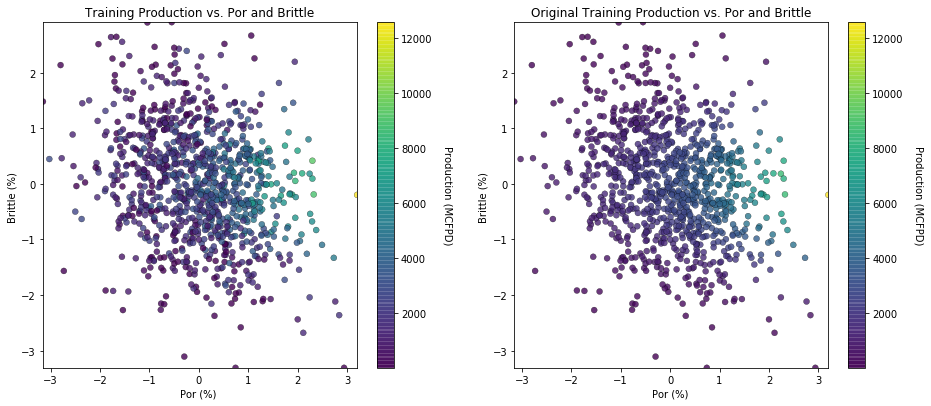

In [13]:
plt.subplot(121)
im = plt.scatter(X[features[ix1]],X[features[ix2]],s=None, c=y[features[iy]], marker=None, cmap=None, norm=None, vmin=vmin[iy], vmax=vmax[iy], alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training ' + str(features[iy]) + ' vs. ' + str(features[ix1]) + ' and ' + str(features[ix2]))
plt.xlabel(str(features[ix1]) + ' (' + str(units[ix1]) + ') '); plt.ylabel(str(features[ix2]) + ' (' + str(units[ix2]) + ') ')
plt.xlim(vmin_trans[ix1],vmax_trans[ix1]); plt.ylim(vmin_trans[ix2],vmax_trans[ix2])
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(str(features[iy]) + ' (' + str(units[iy]) + ')', rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X[features[ix1]],X[features[ix2]],s=None, c=y_old[features[iy]], marker=None, cmap=None, norm=None, vmin=vmin[iy], vmax=vmax[iy], alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Original Training ' + str(features[iy]) + ' vs. ' + str(features[ix1]) + ' and ' + str(features[ix2]))
plt.xlabel(str(features[ix1]) + ' (' + str(units[ix1]) + ') '); plt.ylabel(str(features[ix2]) + ' (' + str(units[ix2]) + ') ')
plt.xlim(vmin_trans[ix1],vmax_trans[ix1]); plt.ylim(vmin_trans[ix2],vmax_trans[ix2])
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(str(features[iy]) + ' (' + str(units[iy]) + ')', rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

This problem looks complicated and could not be modeled with simple linear regression.  It appears there is a sweet spot for Brittleness and increasing Porosity is always beneficial for Production.

#### Instantiate, Tune and then Predict with $k$ Nearest Neighbour

Let's instantiate, fit and predict with a $k$ nearest neighbour model.

* loop over the hyperparameter, $k = k_{min}, \ldots, k_{max}$ 

    * apply k-fold cross validation
    * calculate the average error over the k-folds
    
* plot the error vs. the k hyperparameter

* select the minimum error k in k-fold cross validation

* rebuild the model, training with all data and the tuned k hyperparameter

Recal that k hyperparameter:

* **k** - number of nearest training data to use for the estimate
* **low k** - high model complexity / flexibility
* **high k** - low model complexity / flexibility

To adjust the range of considered k hyperparameter, change this line of code below:

```python
k_min = 2                                                   # hyperparameter range to explore
k_max = 500
```

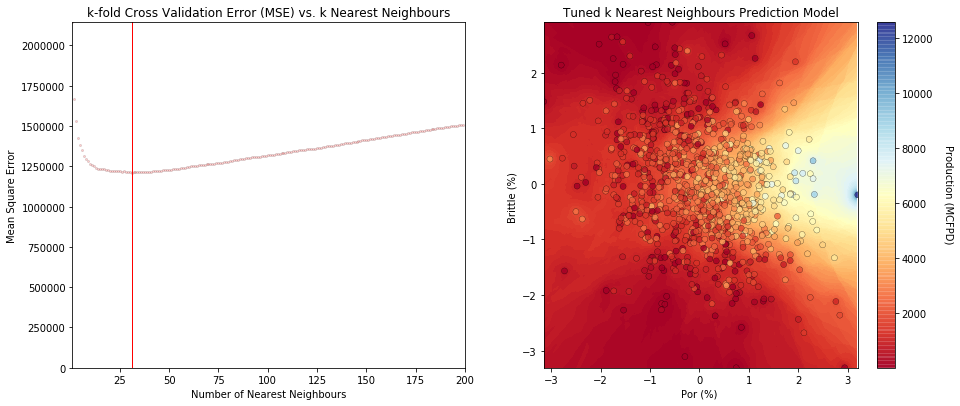

In [35]:
folds = 4                                                   # number of folds for k-fold cross validation
k_min = 1                                                   # hyperparameter range to explore
k_max = 200
#k_max = int(len(my_data)*(folds-1)/(folds))                # use this to select the maximum k possible
np.random.seed(seed = seed)

k_mat = []                                                  # declare lists for k and score
score_mat = []
for k in range(k_min,k_max):                                # loop over k hyperparameter
    neigh_dist = KNeighborsRegressor(weights = 'distance',metric='euclidean',n_neighbors=k, p = 2) # instantiate the model
    scores = cross_val_score(estimator=neigh_dist, X=X,y=y, 
              cv=KFold(n_splits=folds,shuffle=False), 
              n_jobs=4,scoring = "neg_mean_squared_error") 
    k_mat.append(k); score_mat.append(abs(np.average(scores))) # store k and average fold error   

min_error, index_tuned = min((error, index) for (index, error) in enumerate(score_mat)) # find the best k 
k_tuned = k_mat[index_tuned]

plt.subplot(121)
visualize_tuned_model(k_tuned,k_mat,score_mat)              # visualize the error vs. k 

neigh_dist_tuned = KNeighborsRegressor(weights = 'distance', n_neighbors=k_tuned, p = 2) # refit tuned model
neigh_dist_tuned.fit(X,y) 

plt.subplot(122)                                            # visualize the tuned model
visualize_model_wrap(neigh_dist_tuned,ix1,ix2,iy,'Tuned k Nearest Neighbours Prediction Model',trans=True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Same Complete Workflow with Pipelines

Let's repeat the above workflow with a pipline from scikit-learn. Here some general comments:

* **pipeline workflow steps** - list of steps, custom labels and the associated scikit-learn classes
* **choices and hyperparameters** - as a dictionary with combined step custom labels and hyperparameter names
* **workflow scenarios** - we can specify lists of choices and hyperparameters
* **consistent iteration** - the entire workflow is repeated for the full combinatorial
* **best model selected** - best combination of model hyperparameters and choices are refit with all data

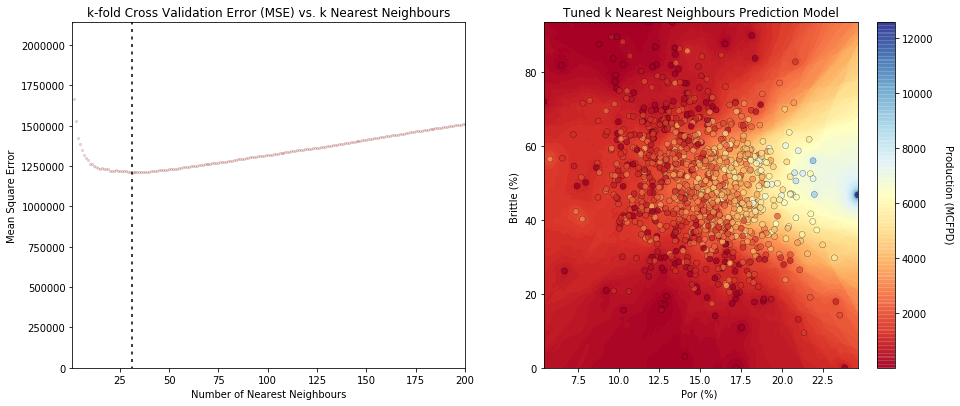

In [92]:
pipe = Pipeline([                                           # the machine learning workflow as a pipeline object
    ('scaler', StandardScaler()),
    ('knear', KNeighborsRegressor())
])

params = {                                                  # the machine learning workflow method's parameters
    'scaler': [StandardScaler()],
    'knear__n_neighbors': np.arange(k_min,k_max+1,1,dtype = int),
    'knear__metric': ['euclidean'],
    'knear__p': [2],
    'knear__weights': ['distance']
}

grid_cv_tuned = GridSearchCV(pipe, params, scoring = 'neg_mean_squared_error', # grid search cross validation 
                             cv=KFold(n_splits=folds,shuffle=False),
                             refit = True)
grid_cv_tuned.fit(X_orig,y)                                 # fit model with tuned hyperparameters

plt.subplot(121)
visualize_tuned_model(grid_cv_tuned.best_params_['knear__n_neighbors'], # visualize the error vs. k 
                      grid_cv_tuned.cv_results_['param_knear__n_neighbors'],
                      abs(grid_cv_tuned.cv_results_['mean_test_score']))              

plt.subplot(122)                                            # visualize the tuned model
visualize_model_wrap(grid_cv_tuned,ix1,ix2,iy,'Tuned k Nearest Neighbours Prediction Model',trans=False)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2);
plt.show()

#### Discussion

Let's compare and contrast the without pipeline and with pipeline workflows.

* **Code Readability** - **With Pipeline**, this is a great advantage for the pipeline workflow. The list of machine learning steps are included in the pipe isntantiation and then the model choices and hyperparameters are listed.

* **Book Keeping** - **With Pipeline**, the pipeline workflow makes this effortless. 
    * *.Fit()* operator conducts cross validation runs over all hyperparameters after the data transformation(s)and then the best model is refit with all the data. 
    * *.Predict()* operator encapsulates the data transformations and prediction with the best, refit model.
    * *best_params_* stores the best model hyperparameters and choices.
    
* **Experimentation** - **With Pipeline**, the pipeline workflow make this extremely compact. You can run any variety of model scenarios and select the best model.

* **Control** - **Without Pipeline**, there is a lot of flexibility with the current pipeline class, but you may be challenged for highly custom workflows and methods ot use the pipeline workflow.

#### Retrieve the Tuned Model Hyperparameters

We can access the best model hyperparameters and choices as the best_params_. 

In [93]:
print('The best model hyperparameters:')
grid_cv_tuned.best_params_

The best model hyperparameters:


{'knear__metric': 'euclidean',
 'knear__n_neighbors': 31,
 'knear__p': 2,
 'knear__weights': 'distance',
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### More Complicate Model Tuning with Pipelines

Let's expand the with pipeline workflow and demonstrate more experimentation.

* Let's iterate over more model hyperparameters and choices by including uniform and distance weighting
* We find the best combination of hyperparameters to minimize error in k-fold cross validation 

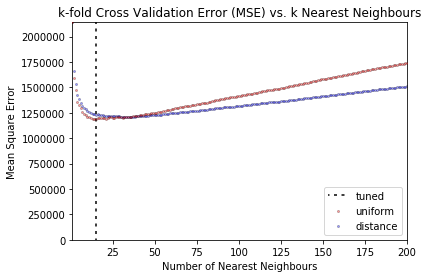

In [94]:
params = {                                                  # the machine learning workflow method's parameters
    'scaler': [StandardScaler()],
    'knear__n_neighbors': np.arange(k_min,k_max+1,1,dtype = int),
    'knear__metric': ['euclidean'],
    'knear__p': [2],
    'knear__weights': ['uniform','distance']
}

grid_cv_tuned = GridSearchCV(pipe, params, scoring = 'neg_mean_squared_error', # grid search cross validation 
                             cv=KFold(n_splits=folds,shuffle=False),
                             refit = True)
grid_cv_tuned.fit(X_orig,y)                                 # fit model with tuned hyperparameters

plt.subplot(111)
visualize_tuned_model2(grid_cv_tuned.best_params_['knear__n_neighbors'], # visualize the error vs. k 
                      grid_cv_tuned.cv_results_['param_knear__n_neighbors'],
                      abs(grid_cv_tuned.cv_results_['mean_test_score'])) 

#### Retrieve the Tuned Model Hyperparameters

We can access the best model hyperparameters and choices as the best_params_ 

In [98]:
print('The best model hyperparameters:')
grid_cv_tuned.best_params_

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'tree__max_depth': 7,
 'tree__max_leaf_nodes': 35,
 'tree__min_samples_leaf': 5}

#### One More Time

Now let's switch to a decision tree model and find the best fit hyperparameters.

* we can use a variety of hyperparameters

* we will do full combinatorial, grid search again

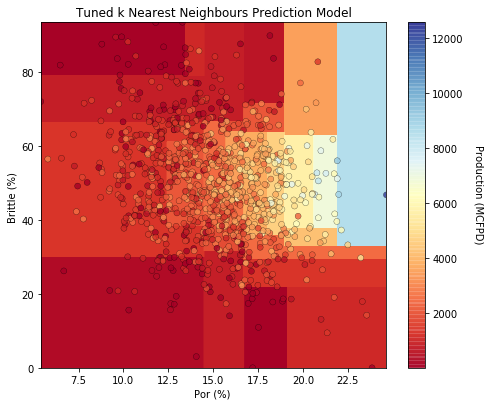

In [99]:
pipe_tree = Pipeline([                                           # the machine learning workflow as a pipeline object
    ('tree', tree.DecisionTreeRegressor())
])

params_tree = {                                                  # the machine learning workflow method's parameters
    'tree__max_depth': np.arange(1,10,1,dtype = int),
    'tree__max_leaf_nodes': np.arange(2,30,1,dtype = int),
    'tree__min_samples_leaf': np.arange(1,10,1,dtype = int),
}

grid_cv_tuned_tree = GridSearchCV(pipe_tree, params_tree, scoring = 'neg_mean_squared_error', # grid search cross validation 
                             cv=KFold(n_splits=folds,shuffle=False),
                             refit = True)

grid_cv_tuned_tree.fit(X_orig,y)                                 # fit model with tuned hyperparameters

plt.subplot(111)                                                 # visualize the tuned model
visualize_model_wrap(grid_cv_tuned_tree,ix1,ix2,iy,'Tuned k Nearest Neighbours Prediction Model',trans=False)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2);
plt.show()

#### Retrieve the Tuned Model Hyperparameters

We can access the best model hyperparameters and choices as the best_params_ 

In [100]:
grid_cv_tuned_tree.best_params_

{'tree__max_depth': 9, 'tree__max_leaf_nodes': 29, 'tree__min_samples_leaf': 5}

#### Comments

This is provided for an opportunity to try out pipelines for building machine learning models.

* this is a basic introduction, much more could be done

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
